In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn import datasets
from sklearn.datasets import load_digits

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

In [6]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

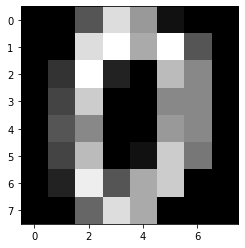

In [7]:
plt.imshow(digits.images[0], cmap = plt.cm.gray)

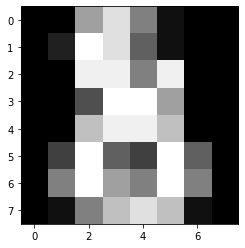

In [8]:
plt.imshow(digits.images[1796], cmap = plt.cm.gray)

In [9]:
df = pd.DataFrame(digits.data, columns = digits['feature_names'])
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
df.shape

(1797, 64)

In [11]:
# Split Data
x = digits.data
y = digits.target

In [12]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [13]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [14]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [15]:
# transpose of x to get features as rows
xt_scaled = x_scaled.T
xt_scaled.shape

(64, 1797)

In [16]:
# calculate covariance matrix of x
cov_mat = np.cov(xt_scaled)
cov_mat.shape

(64, 64)

In [17]:
cov_mat

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.00055679,  0.55692803, ..., -0.02988686,
         0.02656195, -0.04391324],
       [ 0.        ,  0.55692803,  1.00055679, ..., -0.04120565,
         0.07263924,  0.08256908],
       ...,
       [ 0.        , -0.02988686, -0.04120565, ...,  1.00055679,
         0.64868875,  0.26213704],
       [ 0.        ,  0.02656195,  0.07263924, ...,  0.64868875,
         1.00055679,  0.62077355],
       [ 0.        , -0.04391324,  0.08256908, ...,  0.26213704,
         0.62077355,  1.00055679]])

In [18]:
# Calculate Eigen values and Eigen vectors
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_vals

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ,
       2.57204442, 2.40600941, 2.06867355, 1.82993314, 1.78951739,
       1.69784616, 1.57287889, 1.38870781, 1.35933609, 1.32152536,
       1.16829176, 1.08368678, 0.99977862, 0.97438293, 0.90891242,
       0.82271926, 0.77631014, 0.71155675, 0.64552365, 0.59527399,
       0.5765018 , 0.52673155, 0.5106363 , 0.48686381, 0.45560107,
       0.44285155, 0.42230086, 0.3991063 , 0.39110111, 0.36094517,
       0.34860306, 0.3195963 , 0.29406627, 0.27692285, 0.05037444,
       0.06328961, 0.258273  , 0.24783029, 0.2423566 , 0.07635394,
       0.08246812, 0.09018543, 0.09840876, 0.10250434, 0.11188655,
       0.11932898, 0.12426371, 0.13321081, 0.14311427, 0.217582  ,
       0.15818474, 0.16875236, 0.20799593, 0.17612894, 0.2000909 ,
       0.18983516, 0.        , 0.        , 0.        ])

In [19]:
eig_vecs

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.18223392, -0.04702701,  0.02358821, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.285868  , -0.0595648 , -0.05679875, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.103198  ,  0.24261778, -0.02227952, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1198106 ,  0.16508926,  0.10036559, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07149362,  0.07132924,  0.09244589, ...,  0.        ,
         0.        ,  0.        ]])

In [20]:
len(eig_vals)

64

In [21]:
len(eig_vecs)

64

In [22]:
total = sum(eig_vals)
total

61.03396436525629

In [23]:
# Individual explained variance - along the PC the percentage of information retained by each and every vector
var_exp = [(i/total)*100 for i in eig_vals]
print(var_exp)

[12.03391609773489, 9.561054403097865, 8.444414892624549, 6.498407907524174, 4.860154875966416, 4.2141198692719355, 3.9420828035673976, 3.3893809246383286, 2.998221011625237, 2.9320025512522108, 2.781805463550325, 2.5770550925820004, 2.2753033157642486, 2.227179739514356, 2.165229431849243, 1.9141666064421272, 1.7755470851681892, 1.6380692742844327, 1.5964601688623454, 1.4891911870878263, 1.347969565817932, 1.2719313702347574, 1.16583735059195, 1.0576465985363162, 0.9753159471981064, 0.9445589897319964, 0.8630138269707217, 0.836642853668512, 0.7976932484112399, 0.7464713709260606, 0.7255821513702729, 0.6919112454811795, 0.6539085355726145, 0.640792573845988, 0.5913841117223413, 0.5711624052235255, 0.5236368034166371, 0.4818075864451413, 0.45371925985844813, 0.08253509448180292, 0.10369573015571874, 0.4231627532327796, 0.40605306997903756, 0.39708480827582515, 0.1251007424973021, 0.1351184113370851, 0.14776269410608636, 0.1612360622567315, 0.16794638749558297, 0.18331849919718324, 0.195

In [24]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 12.0339161 ,  21.5949705 ,  30.03938539,  36.5377933 ,
        41.39794818,  45.61206805,  49.55415085,  52.94353177,
        55.94175279,  58.87375534,  61.6555608 ,  64.23261589,
        66.50791921,  68.73509895,  70.90032838,  72.81449499,
        74.59004207,  76.22811135,  77.82457152,  79.3137627 ,
        80.66173227,  81.93366364,  83.09950099,  84.15714759,
        85.13246353,  86.07702252,  86.94003635,  87.77667921,
        88.57437245,  89.32084382,  90.04642598,  90.73833722,
        91.39224576,  92.03303833,  92.62442244,  93.19558485,
        93.71922165,  94.20102924,  94.6547485 ,  94.73728359,
        94.84097932,  95.26414208,  95.67019515,  96.06727995,
        96.1923807 ,  96.32749911,  96.4752618 ,  96.63649786,
        96.80444425,  96.98776275,  97.18327518,  97.38687281,
        97.60512967,  97.83961267,  98.19610598,  98.45528092,
        98.73177018,  99.07255736,  99.36113266,  99.68896799,
       100.        , 100.        , 100.        , 100.  

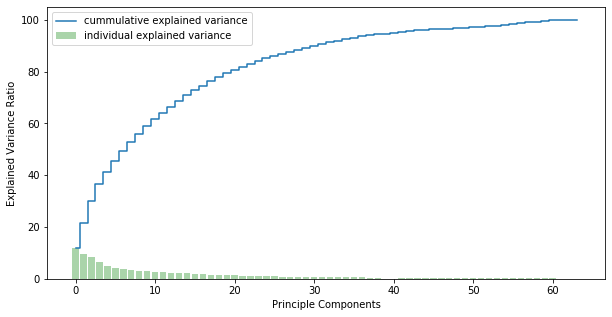

In [25]:
plt.figure(figsize = (10,5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color='g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid', label='cummulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principle Components')
plt.legend(loc='best')
plt.show()

In [26]:
# Train-Test split
xtrain,xtest,ytrain,ytest = train_test_split(x_scaled,y,train_size=0.8)

In [27]:
xtrain.shape

(1437, 64)

In [28]:
# Dimensionality Reduction using PCA
from sklearn.decomposition import PCA

In [29]:
# pca = PCA(n_components=40) 
# OR
pca = PCA(0.90)
pca_xtrain = pca.fit_transform(xtrain)
pca_xtest = pca.transform(xtest)

In [30]:
pca_xtrain.shape

(1437, 31)

In [31]:
# Model Building using Decision Tree 
dt = DecisionTreeClassifier()

In [32]:
dt.fit(pca_xtrain,ytrain)
ypred = dt.predict(pca_xtest)
ypred

array([6, 4, 9, 5, 5, 8, 3, 0, 1, 2, 0, 1, 7, 8, 1, 8, 3, 3, 1, 2, 0, 4,
       7, 9, 4, 6, 6, 8, 5, 6, 8, 6, 5, 1, 0, 1, 6, 8, 7, 0, 0, 6, 4, 3,
       9, 1, 1, 2, 6, 2, 9, 7, 9, 2, 0, 0, 4, 7, 9, 1, 2, 7, 6, 0, 2, 1,
       2, 1, 6, 8, 8, 8, 9, 8, 4, 6, 7, 0, 7, 7, 5, 8, 2, 4, 8, 6, 3, 1,
       5, 2, 1, 7, 5, 2, 5, 8, 8, 2, 6, 8, 1, 0, 4, 3, 4, 5, 4, 4, 6, 5,
       5, 9, 8, 2, 5, 3, 5, 9, 6, 8, 8, 1, 3, 2, 9, 8, 4, 4, 8, 0, 8, 2,
       2, 1, 6, 5, 5, 6, 6, 8, 1, 3, 9, 8, 2, 4, 2, 2, 3, 2, 4, 9, 7, 1,
       3, 6, 5, 4, 7, 3, 4, 1, 7, 0, 9, 3, 4, 4, 6, 1, 4, 9, 1, 4, 8, 2,
       1, 6, 6, 0, 2, 9, 9, 3, 5, 5, 6, 1, 2, 3, 1, 6, 2, 7, 1, 6, 8, 8,
       7, 0, 1, 4, 5, 1, 4, 9, 8, 7, 0, 9, 8, 7, 0, 1, 8, 9, 0, 9, 3, 9,
       3, 4, 6, 0, 9, 7, 3, 5, 5, 5, 1, 3, 8, 3, 8, 6, 9, 8, 6, 6, 8, 3,
       7, 0, 6, 8, 1, 7, 3, 2, 5, 8, 0, 6, 4, 3, 4, 9, 7, 2, 9, 1, 2, 5,
       7, 5, 8, 0, 1, 4, 7, 0, 6, 3, 5, 7, 0, 2, 8, 5, 7, 5, 5, 5, 3, 7,
       2, 7, 9, 1, 7, 5, 1, 1, 1, 0, 4, 1, 5, 0, 8,

In [33]:
ytest

array([6, 4, 9, 5, 1, 8, 3, 0, 1, 2, 0, 1, 7, 3, 1, 8, 3, 3, 1, 2, 0, 4,
       7, 9, 4, 6, 2, 8, 5, 6, 3, 6, 5, 1, 0, 8, 6, 2, 7, 0, 0, 6, 7, 9,
       9, 1, 2, 2, 6, 2, 9, 7, 3, 2, 0, 0, 4, 7, 9, 1, 3, 7, 6, 0, 2, 1,
       2, 1, 6, 5, 8, 9, 9, 8, 5, 6, 7, 0, 8, 7, 5, 1, 2, 4, 8, 2, 3, 1,
       9, 2, 1, 7, 5, 2, 5, 8, 2, 2, 8, 1, 1, 0, 5, 3, 4, 5, 4, 5, 6, 5,
       5, 9, 8, 2, 5, 2, 5, 9, 6, 8, 2, 1, 5, 2, 9, 8, 4, 5, 8, 0, 8, 2,
       2, 1, 6, 5, 5, 6, 6, 8, 1, 3, 7, 8, 2, 4, 2, 2, 2, 2, 5, 9, 7, 1,
       3, 6, 5, 4, 7, 0, 4, 1, 7, 0, 9, 3, 4, 4, 6, 1, 4, 9, 1, 4, 8, 2,
       1, 0, 6, 0, 0, 4, 9, 3, 5, 5, 6, 1, 2, 3, 6, 6, 2, 2, 1, 6, 8, 3,
       7, 0, 1, 4, 5, 1, 4, 9, 2, 7, 0, 9, 8, 7, 0, 1, 8, 9, 6, 9, 3, 9,
       3, 1, 1, 0, 9, 7, 3, 5, 5, 5, 1, 9, 8, 3, 8, 6, 9, 3, 6, 6, 1, 3,
       4, 0, 1, 8, 1, 7, 3, 2, 5, 8, 0, 6, 4, 3, 4, 9, 7, 0, 9, 1, 2, 5,
       7, 5, 8, 0, 1, 4, 7, 0, 6, 9, 5, 7, 0, 2, 8, 5, 7, 5, 5, 5, 3, 4,
       7, 7, 9, 1, 7, 1, 1, 1, 1, 0, 4, 1, 5, 0, 5,

In [34]:
# Model Evaluation
accuracy_score(ypred, ytest)

0.8305555555555556

In [35]:
confusion_matrix(ypred,ytest)

array([[30,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 39,  1,  0,  0,  0,  2,  0,  2,  0],
       [ 2,  0, 28,  3,  0,  0,  0,  1,  0,  0],
       [ 1,  0,  2, 24,  0,  1,  0,  0,  0,  3],
       [ 0,  1,  0,  0, 30,  6,  0,  1,  0,  0],
       [ 0,  2,  0,  0,  0, 33,  0,  0,  0,  1],
       [ 1,  2,  2,  0,  0,  0, 31,  0,  1,  0],
       [ 0,  0,  1,  0,  2,  0,  0, 28,  1,  0],
       [ 0,  3,  5,  5,  0,  2,  0,  0, 26,  1],
       [ 0,  0,  0,  2,  1,  1,  0,  1,  0, 30]], dtype=int64)